# Combined Notebook

### ~ Nikhil Roy, Ayaan Siddiqui, Brayden Yan

For our project, we picked three factors that we thought were most important for the determination of a good neighborhood. The Pittsburgh SNAP Census datasets (2010) had all the information we needed, indexed by neighborhood. The factors we chose were:

1. Natural Environmental Conditions
2. Public Safety
2. Housing

In [35]:
import pandas as pd
import numpy as np
import geopandas as geo
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt
neighborhoods = geo.read_file("pittsburgh-pa-neighborhoods.shp")
public_safety = pd.read_csv("Public Safety 2010.csv", index_col="Neighborhood")
nat = pd.read_csv("Natural Environment Conditions 2010.csv", index_col = "Neighborhood")
house = pd.read_csv("Housing 2010.csv")

## Factor 1 - Public Safety ##

#### For our next metric, we are trying to find out which neighborhood is the safest. We will start off by figuring out which neighborhoods are the most theft-free and which are the most drug-free. With these two criteria, we will classify which neighborhood comes on top for "the most safe neighborhood".
---

### Critera one: Most theft-free

In [5]:
burglaries = public_safety.groupby("Neighborhood").sum()['#Burglary (2010)']
burglaries

Neighborhood
Allegheny Center        8
Allegheny West          6
Allentown              48
Arlington              15
Arlington Heights       5
                       ..
Upper Lawrenceville    24
West End                7
West Oakland           14
Westwood               17
Windgap                 8
Name: #Burglary (2010), Length: 90, dtype: int64

In [6]:
auto_theft = public_safety.groupby("Neighborhood").sum()['#Auto Theft (2010)']
auto_theft

Neighborhood
Allegheny Center        5
Allegheny West          4
Allentown              11
Arlington               7
Arlington Heights       3
                       ..
Upper Lawrenceville    12
West End                3
West Oakland            8
Westwood                6
Windgap                 7
Name: #Auto Theft (2010), Length: 90, dtype: int64

In [7]:
robbery = public_safety.groupby("Neighborhood").sum()['#Robbery (2010)']
robbery

Neighborhood
Allegheny Center        9
Allegheny West          4
Allentown              15
Arlington               8
Arlington Heights       4
                       ..
Upper Lawrenceville    12
West End                2
West Oakland           13
Westwood                1
Windgap                 4
Name: #Robbery (2010), Length: 90, dtype: int64

## Lets combine them altogether to make one "Theft" score for each neighborhood

In [8]:
theft = pd.concat([burglaries, auto_theft, robbery], axis = 1, join='inner')
theft["Thefts"] = np.nan
for x in range(len(theft)):
    theft.iloc[x,3] = 0
    for y in range(3):
        theft.iloc[x,3] += theft.iloc[x,y]
theft = theft.sort_values(by=['Thefts'], ascending=True)
theft

,#Burglary (2010),#Auto Theft (2010),#Robbery (2010),Thefts
Neighborhood,,,,
Fairywood,1,0,0,1.0
Chateau,0,2,1,3.0
New Homestead,1,2,0,3.0
Ridgemont,3,0,0,3.0
Chartiers City,2,2,0,4.0
...,...,...,...,...
Bloomfield,70,36,45,151.0
Mount Washington,115,38,22,175.0
South Side Flats,74,56,52,182.0


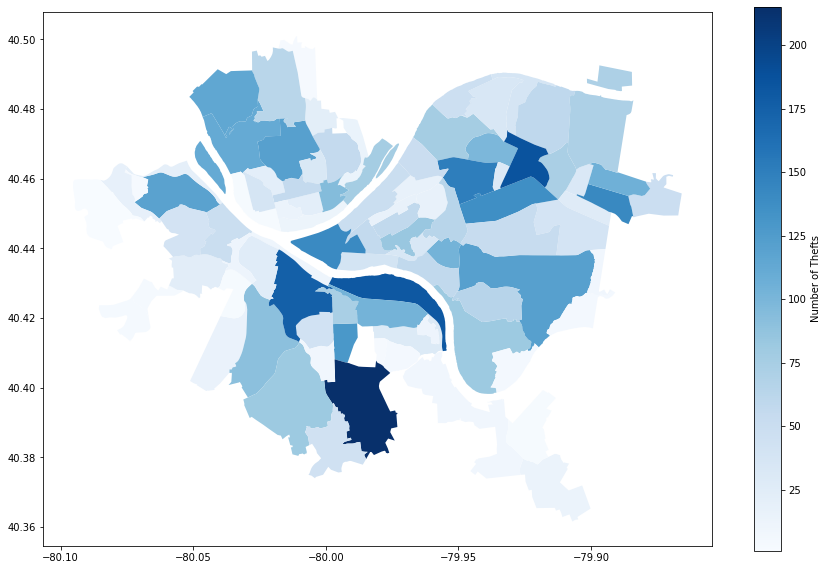

In [12]:
theft_graph = theft.groupby("Neighborhood").sum()['Thefts']
theft_map = neighborhoods.merge(theft_graph, how='left', left_on='hood', right_on='Neighborhood')
theft_map.plot(column='Thefts',
                  cmap='Blues',
                  figsize=(15,10), 
                  legend=True,
                  legend_kwds={'label':"Number of Thefts"}
                  )

## Fairywood is looking good! 
---
### Criteria two: Drug-free
---

In [13]:
drug_vio = public_safety.groupby("Neighborhood").sum()['#Drug Violations (2010)']
drug_vio = drug_vio.sort_values(ascending=False)
drug_vio

Neighborhood
Knoxville           113
Middle Hill         102
Crawford-Roberts     90
Perry South          87
East Allegheny       73
                   ... 
Swisshelm Park        0
East Carnegie         0
Fairywood             0
St. Clair             0
Lincoln Place         0
Name: #Drug Violations (2010), Length: 90, dtype: int64

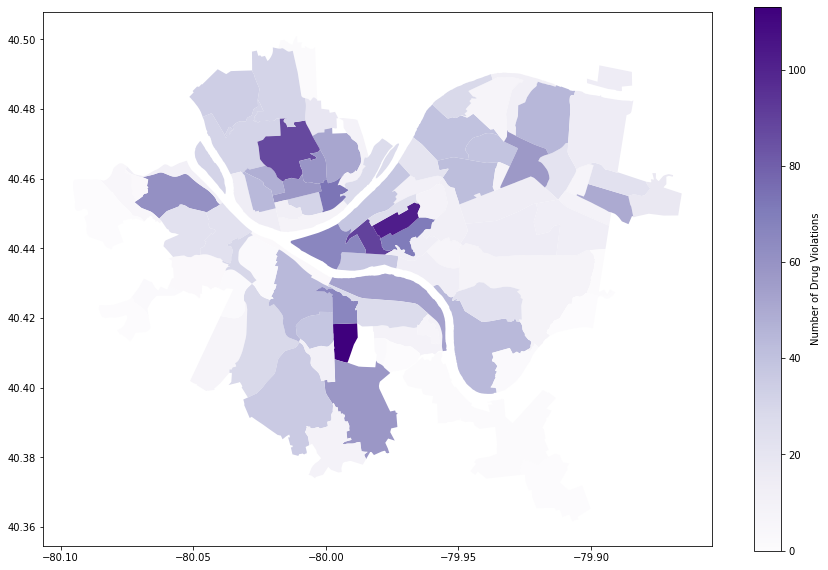

In [14]:
drug_map = neighborhoods.merge(drug_vio, how='left', left_on='hood', right_on='Neighborhood')
drug_map.plot(column='#Drug Violations (2010)',
                  cmap='Purples',
                  figsize=(15,10), 
                  legend=True,
                  legend_kwds={'label':"Number of Drug Violations"}
                  )

---

### Combined Safety Score

In [16]:
thefts = theft.groupby("Neighborhood").sum()['Thefts']
best_neigh = pd.concat([thefts, drug_vio], axis = 1, join='inner')
best_neigh["Crime Scores"] = np.nan
for x in range(len(best_neigh)):
    best_neigh.iloc[x,2] = 0
    for y in range(2):
        best_neigh.iloc[x,2] += best_neigh.iloc[x,y]
best_neigh = best_neigh.sort_values(by=['Crime Scores'], ascending=True)
best_neigh

,Thefts,#Drug Violations (2010),Crime Scores
Neighborhood,,,
Fairywood,1.0,0,1.0
New Homestead,3.0,1,4.0
East Carnegie,5.0,0,5.0
Ridgemont,3.0,2,5.0
Summer Hill,4.0,1,5.0
...,...,...,...
Mount Washington,175.0,44,219.0
South Side Flats,182.0,53,235.0
Knoxville,129.0,113,242.0


## Fairywood takes the **W!**

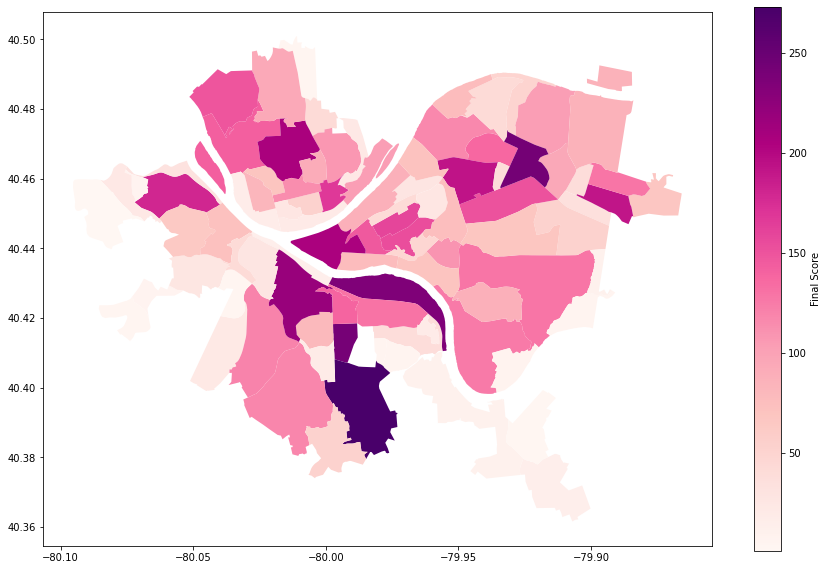

In [23]:
final_graph = best_neigh.groupby("Neighborhood").sum()['Crime Scores']
final_map = neighborhoods.merge(final_graph, how='left', left_on='hood', right_on='Neighborhood')
final_map.plot(column='Crime Scores',
                  cmap='RdPu',
                  figsize=(15,10), 
                  legend=True,
                  legend_kwds={'label':"Final Score"}
                  )

---

## Factor 2 - Housing

#### The dataset:

In [25]:
house

,Sector #,Population (2010),Total # Units (2000),Total # Units (2010),% Occupied Units (2010),% Vacant Units (2010),# Occupied Units (2010),% Owner Occupied Units (2010),% Renter Occupied Units (2010),Est. Avg. Yrs. of Residence (2010),...,% Units Built before 1939,Median Home Value (2000),Med. Val. ('00 in '10 Dollars),Median Home Value (2010),% Change Real Value 2000-2010,Median Sale Price (2010),# Sales Counted (2010),Foreclosures (2008),Foreclosures (2010),% of all Housing Units Foreclosed (2010)
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,3,933,675,1052,0.515209,0.484791,535,0.100935,0.899065,0.0,...,0.012821,86500.0,109535.000000,136300.0,0.244351,NaN,0,0,0,0.000000
Allegheny West,3,462,390,355,0.749296,0.250704,203,0.182266,0.817734,15.0,...,0.574468,159700.0,202228.202312,123600.0,-0.388809,309940.0,7,0,1,0.002817
Allentown,6,2500,1505,1291,0.800155,0.199845,953,0.591815,0.408185,5.0,...,0.628886,34300.0,43434.109827,42200.0,-0.028413,8500.0,70,27,11,0.008521
Arlington,7,1869,880,886,0.865688,0.134312,754,0.653846,0.346154,11.0,...,0.723205,38800.0,49132.462428,44200.0,-0.100391,15397.0,34,12,13,0.014673
Arlington Heights,7,244,557,148,0.912162,0.087838,139,0.187050,0.812950,2.0,...,0.092391,45000.0,56983.526012,64400.0,0.130151,NaN,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,13,2669,1504,1442,0.809986,0.190014,1183,0.606086,0.393914,5.0,...,0.796331,35900.0,45460.190751,48700.0,0.071267,38000.0,65,14,7,0.004854
West End,4,254,211,165,0.745455,0.254545,62,0.338710,0.661290,4.0,...,0.732759,26800.0,33936.855491,29800.0,-0.121899,14382.5,10,2,8,0.048485
West Oakland,14,2604,638,687,0.864629,0.135371,580,0.384483,0.615517,2.0,...,0.471074,47500.0,60149.277457,61100.0,0.015806,66000.0,17,3,1,0.001456


### Population Analysis

In [42]:
pop = house.dropna()
pop = pop.iloc[:,[0,2]]
groupedData = pop.groupby('Neighborhood')['Population (2010)'].mean()
groupedData

Neighborhood
Allegheny West          462.0
Allentown              2500.0
Arlington              1869.0
Banksville             4144.0
Bedford Dwellings      1202.0
                        ...  
Upper Lawrenceville    2669.0
West End                254.0
West Oakland           2604.0
Westwood               3066.0
Windgap                1369.0
Name: Population (2010), Length: 83, dtype: float64

### **Top 10 most Populated neighborhood**

In [61]:
sortPop = pop.sort_values(ascending=False, by = ["Population (2010)"])
topFive = sortPop.head(5)
topTen = sortPop.head(10) #Top 10 most populated neighborhoods

topTen

,Neighborhood,Population (2010)
76,Squirrel Hill South,15110
67,Shadyside,13915
13,Brookline,13214
75,Squirrel Hill North,11363
55,North Oakland,10551
15,Carrick,10113
52,Mount Washington,8799
9,Bloomfield,8442
7,Beechview,7974
36,Greenfield,7294


### Graphical Analysis 

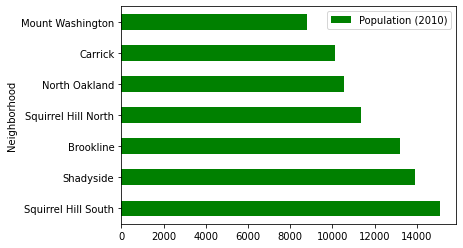

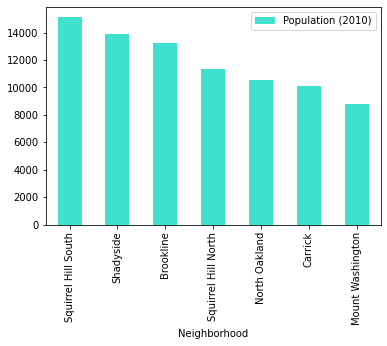

In [33]:
#Use seaborn or matplotlib to plot a more detailed graph... This is just for show rn
sortPop.head(7).plot.barh(x = "Neighborhood", y = "Population (2010)", color = "green")
sortPop.head(7).plot.bar(x = "Neighborhood", y = "Population (2010)", color = "turquoise")

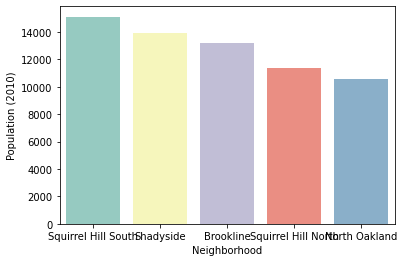

In [36]:
box = sb.barplot(x = "Neighborhood", y = "Population (2010)", data = topFive,  palette="Set3", errwidth = 1)
plt.show(box)

## Total Units in *2000 vs 2010*

In [37]:
pop = house.dropna()
pop = pop.iloc[:,[3,4]]
pop

,Total # Units (2000),Total # Units (2010)
1,390,355
2,1505,1291
3,880,886
5,2203,2118
6,1049,746
...,...,...
85,1504,1442
86,211,165
87,638,687
88,1499,1496


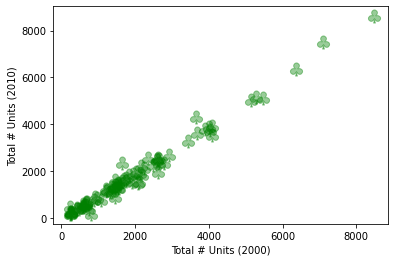

,Total # Units (2000),Total # Units (2010)
count,83.000000,83.000000
mean,1936.096386,1852.204819
std,1625.987134,1652.787990
min,193.000000,165.000000
25%,694.000000,648.000000
50%,1505.000000,1469.000000
75%,2560.000000,2361.000000
max,8451.000000,8610.000000


In [38]:
np.random.seed(19680801)


x = pop["Total # Units (2000)"]
y = pop["Total # Units (2010)"]
s = 200

plt.scatter(x, y, s, c="g", alpha= 0.4, marker=r'$\clubsuit$',
            label="Luck")
plt.xlabel("Total # Units (2000)")
plt.ylabel("Total # Units (2010)")
plt.show()
pop.describe()

---

## Factor 3: Natural Environmental Conditions

### The dataset:

In [44]:
nat

,Sector #,Population (2010),Land Area (acres),Landslide Prone (% land area),Undermined (% land area),Flood Plain (% land area),# Street Trees,Park Space (acres),Park Space (% of land area),Park Space (acres/1000 pers.),Greenway (% of land area),Woodland (% of land area),Cemetery (% of land area)
Neighborhood,,,,,,,,,,,,,
Allegheny Center,3,933,134.40,0.000000,0.000000,0.001637,22,55.264,0.411190,59.232583,0.000000,0.000000,0.000000
Allegheny West,3,462,90.24,0.093273,0.000000,0.023105,229,7.182,0.079588,15.545455,0.000000,0.042354,0.000000
Allentown,6,2500,188.80,0.270911,0.903528,0.000000,87,39.385,0.208607,15.754000,0.000000,0.123093,0.000000
Arlington,7,1869,300.80,0.414182,0.572543,0.015170,79,6.747,0.022430,3.609952,0.000000,0.294289,0.073075
Arlington Heights,7,244,84.48,0.398935,0.611955,0.000000,3,0.000,0.000000,0.000000,0.000000,0.417969,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,13,2669,259.20,0.139144,0.000000,0.119043,246,3.252,0.012546,1.218434,0.001505,0.064356,0.000000
West End,4,254,128.00,0.167992,0.000000,0.254047,108,7.796,0.060906,30.692913,0.003680,0.132227,0.000000
West Oakland,14,2604,137.60,0.645349,0.191868,0.000000,73,1.051,0.007638,0.403610,0.000000,0.133757,0.000000


In order to properly use this data to gauge which neighborhoods are better than others we can start by sorting out the data we ought to use.

For our purposes, we will only be using the data representing percentages of land area that are covered or affected by certain things. This way, statistics will be consistent and meaningful regardless of the relative sizes of the neighborhoods.

Also, we can sort our percentage statistics into two distinct camps: Danger levels and aesthetic levels.

Danger levels are worse the higher they are, and aesthetics vice versa.

### Danger:

This will include landslide likelihood, how undermined a neighborhood is, and how much of a neighborhood is a flood plain.

These are all directly correlated with how big of a risk it is to live in said neighborhood.

In [45]:
safe1 = nat.groupby("Neighborhood").sum()['Landslide Prone (% land area)']
safe1

Neighborhood
Allegheny Center       0.000000
Allegheny West         0.093273
Allentown              0.270911
Arlington              0.414182
Arlington Heights      0.398935
                         ...   
Upper Lawrenceville    0.139144
West End               0.167992
West Oakland           0.645349
Westwood               0.152369
Windgap                0.110271
Name: Landslide Prone (% land area), Length: 90, dtype: float64

In [46]:
safe2 = nat.groupby("Neighborhood").sum()['Undermined (% land area)']
safe2

Neighborhood
Allegheny Center       0.000000
Allegheny West         0.000000
Allentown              0.903528
Arlington              0.572543
Arlington Heights      0.611955
                         ...   
Upper Lawrenceville    0.000000
West End               0.000000
West Oakland           0.191868
Westwood               0.795577
Windgap                0.000000
Name: Undermined (% land area), Length: 90, dtype: float64

In [47]:
safe3 = nat.groupby("Neighborhood").sum()['Flood Plain (% land area)']
safe3

Neighborhood
Allegheny Center       0.001637
Allegheny West         0.023105
Allentown              0.000000
Arlington              0.015170
Arlington Heights      0.000000
                         ...   
Upper Lawrenceville    0.119043
West End               0.254047
West Oakland           0.000000
Westwood               0.000000
Windgap                0.021382
Name: Flood Plain (% land area), Length: 90, dtype: float64

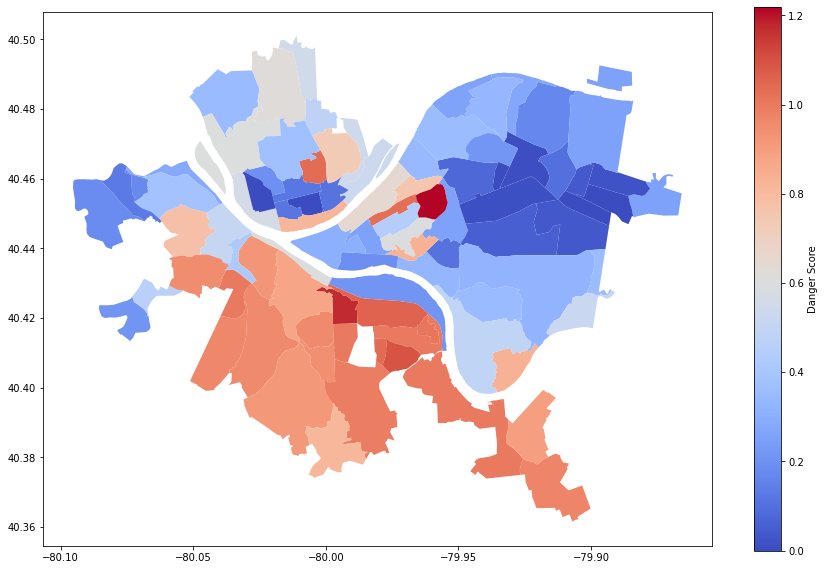

In [48]:
dangscore = pd.concat([safe1, safe2, safe3], axis = 1, join='inner')
dangscore["Danger Score"] = np.nan

for x in range(len(dangscore)):
    dangscore.iloc[x,3] = 0
    for y in range(3):
        dangscore.iloc[x,3] += dangscore.iloc[x,y]

dangchart = dangscore.groupby("Neighborhood").sum()["Danger Score"]
shape = geo.read_file("pittsburgh-pa-neighborhoods.shp")

dangmap = shape.merge(dangchart, how = 'right', left_on='hood', right_on='Neighborhood')
dangmap.plot(column="Danger Score", cmap='coolwarm', figsize=(15,10), legend=True, legend_kwds={'label': "Danger Score"})

---
We will now construct a map reflecting a cumulative "danger score," or simply the sum of all three percentage values of our "danger" data per neighborhood.

This will reflect how generally dangerous it is to live in a certain neighborhood, natural-disaster-wise.

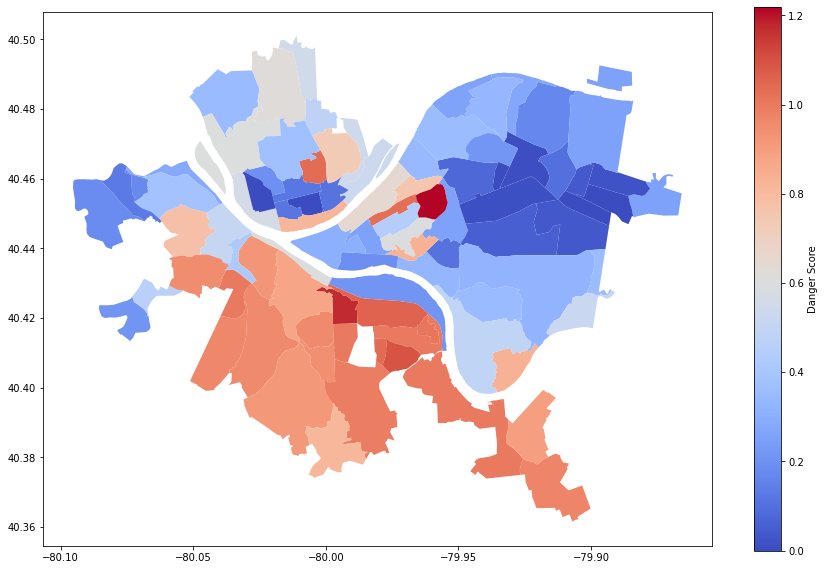

In [49]:
dangscore = pd.concat([safe1, safe2, safe3], axis = 1, join='inner')
dangscore["Danger Score"] = np.nan

for x in range(len(dangscore)):
    dangscore.iloc[x,3] = 0
    for y in range(3):
        dangscore.iloc[x,3] += dangscore.iloc[x,y]

dangchart = dangscore.groupby("Neighborhood").sum()["Danger Score"]
shape = geo.read_file("pittsburgh-pa-neighborhoods.shp")

dangmap = shape.merge(dangchart, how = 'right', left_on='hood', right_on='Neighborhood')
dangmap.plot(column="Danger Score", cmap='coolwarm', figsize=(15,10), legend=True, legend_kwds={'label': "Danger Score"})

In [50]:
dangscore = dangscore.sort_values(by=['Danger Score'], ascending = False)
dangscore

,Landslide Prone (% land area),Undermined (% land area),Flood Plain (% land area),Danger Score
Neighborhood,,,,
Upper Hill,0.385134,0.833561,0.000000,1.218695
Allentown,0.270911,0.903528,0.000000,1.174439
St. Clair,0.470877,0.618674,0.001129,1.090680
South Side Slopes,0.663595,0.397680,0.000000,1.061276
Mt. Oliver,0.092297,0.947063,0.000000,1.039359
...,...,...,...,...
Allegheny Center,0.000000,0.000000,0.001637,0.001637
Manchester,0.000000,0.000000,0.000571,0.000571
Friendship,0.000000,0.000000,0.000000,0.000000


## Aesthetics

This category includes the percentage of land area occupied by things that are generally pleasing to look at, such as parks, greenways, woodlands, and cemeteries (hey, they DO usually look pretty nice. I wouldn't call a cemetery idyllic, exactly, but they're charming.)

In [51]:
aes1 = nat.groupby("Neighborhood").sum()['Park Space (% of land area)']	
aes1

Neighborhood
Allegheny Center       0.411190
Allegheny West         0.079588
Allentown              0.208607
Arlington              0.022430
Arlington Heights      0.000000
                         ...   
Upper Lawrenceville    0.012546
West End               0.060906
West Oakland           0.007638
Westwood               0.032603
Windgap                0.043844
Name: Park Space (% of land area), Length: 90, dtype: float64

In [52]:
aes2 = nat.groupby("Neighborhood").sum()['Greenway (% of land area)']	
aes2

Neighborhood
Allegheny Center       0.000000
Allegheny West         0.000000
Allentown              0.000000
Arlington              0.000000
Arlington Heights      0.000000
                         ...   
Upper Lawrenceville    0.001505
West End               0.003680
West Oakland           0.000000
Westwood               0.000000
Windgap                0.000000
Name: Greenway (% of land area), Length: 90, dtype: float64

In [53]:
aes3 = nat.groupby("Neighborhood").sum()['Woodland (% of land area)']	
aes3

Neighborhood
Allegheny Center       0.000000
Allegheny West         0.042354
Allentown              0.123093
Arlington              0.294289
Arlington Heights      0.417969
                         ...   
Upper Lawrenceville    0.064356
West End               0.132227
West Oakland           0.133757
Westwood               0.232011
Windgap                0.232048
Name: Woodland (% of land area), Length: 90, dtype: float64

In [54]:
aes4 = nat.groupby("Neighborhood").sum()['Cemetery (% of land area)']	
aes4

Neighborhood
Allegheny Center       0.000000
Allegheny West         0.000000
Allentown              0.000000
Arlington              0.073075
Arlington Heights      0.000000
                         ...   
Upper Lawrenceville    0.000000
West End               0.000000
West Oakland           0.000000
Westwood               0.000000
Windgap                0.000000
Name: Cemetery (% of land area), Length: 90, dtype: float64

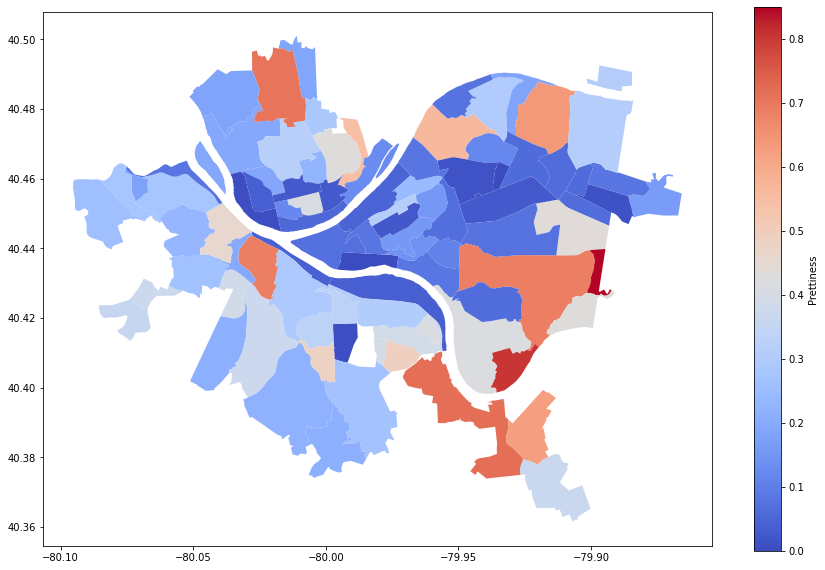

In [55]:
aesscore = pd.concat([aes1,aes2,aes3,aes4], axis = 1, join='inner')
aesscore["Prettiness"] = np.nan

for x in range(len(aesscore)):
    aesscore.iloc[x,4] = 0
    for y in range(4):
        aesscore.iloc[x,4] += aesscore.iloc[x,y]

aeschart = aesscore.groupby("Neighborhood").sum()["Prettiness"]
shape = geo.read_file("pittsburgh-pa-neighborhoods.shp")

aesmap = shape.merge(aeschart, how = 'left', left_on='hood', right_on='Neighborhood')
aesmap.plot(column="Prettiness", cmap='coolwarm', figsize=(15,10), legend=True, legend_kwds={'label': "Prettiness"})

In [56]:
aesscore = aesscore.sort_values(by=['Prettiness'], ascending = False)
aesscore

,Park Space (% of land area),Greenway (% of land area),Woodland (% of land area),Cemetery (% of land area),Prettiness
Neighborhood,,,,,
Regent Square,0.516431,0.000000,0.333203,0.000000,0.849634
Glen Hazel,0.000445,0.158881,0.646214,0.000024,0.805564
Hays,0.001128,0.000000,0.717273,0.000000,0.718401
Perry North,0.333431,0.000000,0.375705,0.000004,0.709140
Squirrel Hill South,0.400472,0.000000,0.289307,0.000000,0.689779
...,...,...,...,...,...
Homewood South,0.011460,0.000000,0.000000,0.000000,0.011460
Chateau,0.006474,0.000000,0.000000,0.000000,0.006474
Knoxville,0.000264,0.000000,0.004760,0.000000,0.005024


## Combined Scores

In order to reach our conclusion on which neighborhoods are the best on an environmental basis, we simply sum the danger and prettiness scores, but with danger as a negative value.

To interpret the sum, a greater positive final score indicates both overwhelming safety combined with copious scenery. Splendid.
A score close to zero indicates a balance between the two, perhaps great safety combined with average scenery, or awful safety combined with great scenery, which both average out to a mediocre environmental experience.
A negative score indicates a neighborhood with sights that are not worth the risk in living there, as the negative danger score outweighs however the neighborhood may look.


In [58]:
danger = dangscore.groupby("Neighborhood").sum()['Danger Score']
aesthetic = aesscore.groupby("Neighborhood").sum()['Prettiness']

danger = -danger

results = pd.concat([danger, aesthetic], axis=1, join='inner')
results["Final Score"] = np.nan

for x in range(len(results)):
    results.iloc[x,2] = 0
    for y in range(2):
        results.iloc[x,2] += results.iloc[x,y]
    
results = results.sort_values(by=['Final Score'], ascending=False)    
results

,Danger Score,Prettiness,Final Score
Neighborhood,,,
Regent Square,-0.354736,0.849634,0.494897
Highland Park,-0.167466,0.639850,0.472384
Allegheny Center,-0.001637,0.411190,0.409554
Point Breeze,-0.038068,0.435558,0.397490
Squirrel Hill South,-0.320420,0.689779,0.369359
...,...,...,...
North Shore,-0.819585,0.055332,-0.764253
Fineview,-1.033531,0.228069,-0.805462
Allentown,-1.174439,0.331700,-0.842738


Our resulting neighborrhood winners for environmental standards come out to be:

In [59]:
results.head(10)

,Danger Score,Prettiness,Final Score
Neighborhood,,,
Regent Square,-0.354736,0.849634,0.494897
Highland Park,-0.167466,0.639850,0.472384
Allegheny Center,-0.001637,0.411190,0.409554
Point Breeze,-0.038068,0.435558,0.397490
Squirrel Hill South,-0.320420,0.689779,0.369359
Central Lawrenceville,-0.356609,0.561939,0.205330
Windgap,-0.131653,0.275892,0.144239
East Carnegie,-0.214073,0.358268,0.144195
Perry North,-0.623088,0.709140,0.086052


## Regent Square appears to be the best in terms of Natural Environmental Conditions 

---

# Final Combined Results 


## The 3 best neighborhoods in terms of safety are:

In [69]:
best_neigh.head(3)

,Thefts,#Drug Violations (2010),Crime Scores
Neighborhood,,,
Fairywood,1.0,0,1.0
New Homestead,3.0,1,4.0
East Carnegie,5.0,0,5.0


# Fairywood
## New Homestead
### East Carnegie
---

## The 3 best neighborhoods in terms of housing are:

In [71]:
topTen.head(3)

,Neighborhood,Population (2010)
76,Squirrel Hill South,15110
67,Shadyside,13915
13,Brookline,13214


# Squirrel Hill South	
## Shadyside
### Brookline
---

## The 3 best neighborhoods in terms of natural conditions are:

In [72]:
results.head(3)

,Danger Score,Prettiness,Final Score
Neighborhood,,,
Regent Square,-0.354736,0.849634,0.494897
Highland Park,-0.167466,0.639850,0.472384
Allegheny Center,-0.001637,0.411190,0.409554


# Regent Square	
## Highland Park
### Allegheny Center

---